In [32]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import os
import sys
sys.path.append("../codebase")
sys.path.append("../models")


mpl.rc('text', usetex=True)
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 20

%matplotlib inline

In [2]:
import sympy as sp
from sympy import init_printing 
init_printing(use_latex='mathjax')

In [3]:
DeltaF, Fb, t0, teff, tE, t = sp.symbols('DeltaF Fb t0 teff tE t', real=True)

u0 = teff/tE
u = sp.sqrt(u0**2 + (t - t0)**2/tE**2)
A = lambda u: (u**2 + 2)/(u*sp.sqrt(u**2 + 4))

F = DeltaF*(A(u) - 1)/(A(u0) - 1) + Fb

In [4]:
print(sp.simplify(sp.diff(F, DeltaF)))

-tE*teff*sqrt(4*tE**2 + teff**2)*(2*tE**2 + teff**2 + (t - t0)**2 - sqrt(4*tE**2*teff**2 + 4*tE**2*(t - t0)**2 + teff**4 + 2*teff**2*(t - t0)**2 + (t - t0)**4))/((tE*teff*sqrt(4*tE**2 + teff**2) - (2*tE**2 + teff**2)*Abs(tE))*sqrt(4*tE**2*teff**2 + 4*tE**2*(t - t0)**2 + teff**4 + 2*teff**2*(t - t0)**2 + (t - t0)**4))


In [5]:
print(sp.simplify(sp.diff(F, Fb)))

1


In [6]:
print(sp.simplify(sp.diff(F, t0)))

-DeltaF*tE*teff*(t - t0)*sqrt(4*tE**2 + teff**2)*(teff**2 + (t - t0)**2)*(4*tE**2 + teff**2 + (t - t0)**2)*((teff**2 + (t - t0)**2)*(2*tE**2 + teff**2 + (t - t0)**2) - 2*(teff**2 + (t - t0)**2)*(4*tE**2 + teff**2 + (t - t0)**2) + (2*tE**2 + teff**2 + (t - t0)**2)*(4*tE**2 + teff**2 + (t - t0)**2))/((tE*teff*sqrt(4*tE**2 + teff**2) - (2*tE**2 + teff**2)*Abs(tE))*(4*tE**2*teff**2 + 4*tE**2*(t - t0)**2 + teff**4 + 2*teff**2*(t - t0)**2 + (t - t0)**4)**(5/2))


In [7]:
print(sp.simplify(sp.diff(F, teff)))

-DeltaF*tE*(-teff**2*(4*tE**2 + teff**2)*(teff**2 + (t - t0)**2)*(tE*teff*sqrt(4*tE**2 + teff**2) - (2*tE**2 + teff**2)*Abs(tE))*(4*tE**2 + teff**2 + (t - t0)**2)*((teff**2 + (t - t0)**2)*(2*tE**2 + teff**2 + (t - t0)**2) - 2*(teff**2 + (t - t0)**2)*(4*tE**2 + teff**2 + (t - t0)**2) + (2*tE**2 + teff**2 + (t - t0)**2)*(4*tE**2 + teff**2 + (t - t0)**2)) - (teff**2*(2*tE**2 + teff**2) - 2*teff**2*(4*tE**2 + teff**2) + (2*tE**2 + teff**2)*(4*tE**2 + teff**2))*(2*tE**2 + teff**2 + (t - t0)**2 - sqrt(4*tE**2*teff**2 + 4*tE**2*(t - t0)**2 + teff**4 + 2*teff**2*(t - t0)**2 + (t - t0)**4))*(4*tE**2*teff**2 + 4*tE**2*(t - t0)**2 + teff**4 + 2*teff**2*(t - t0)**2 + (t - t0)**4)**2*Abs(tE))*sqrt(4*tE**2*teff**2 + 4*tE**2*(t - t0)**2 + teff**4 + 2*teff**2*(t - t0)**2 + (t - t0)**4)/(sqrt(4*tE**2 + teff**2)*(teff**2 + (t - t0)**2)**3*(tE*teff*sqrt(4*tE**2 + teff**2) - (2*tE**2 + teff**2)*Abs(tE))**2*(4*tE**2 + teff**2 + (t - t0)**2)**3)


In [8]:
print(sp.simplify(sp.diff(F, tE)))

DeltaF*teff*((4*tE**2 + teff**2)*((teff**2 + (t - t0)**2)*(2*tE**2 + teff**2 + (t - t0)**2) + (2*tE**2 - teff**2 - (t - t0)**2)*(4*tE**2 + teff**2 + (t - t0)**2))*(-tE*teff*sqrt(4*tE**2 + teff**2) + (2*tE**2 + teff**2)*Abs(tE))*sqrt(4*tE**2 + teff**2 + (t - t0)**2)*sqrt(4*tE**2*teff**2 + 4*tE**2*(t - t0)**2 + teff**4 + 2*teff**2*(t - t0)**2 + (t - t0)**4) + sqrt(teff**2 + (t - t0)**2)*(4*tE**2 + teff**2 + (t - t0)**2)**2*(teff**2*(2*tE**2 + teff**2) - 2*teff**2*(4*tE**2 + teff**2) + (2*tE**2 + teff**2)*(4*tE**2 + teff**2))*(-2*tE**2 - teff**2 - (t - t0)**2 + sqrt(4*tE**2*teff**2 + 4*tE**2*(t - t0)**2 + teff**4 + 2*teff**2*(t - t0)**2 + (t - t0)**4))*Abs(tE))/(sqrt(4*tE**2 + teff**2)*(teff**2 + (t - t0)**2)*(-tE*teff*sqrt(4*tE**2 + teff**2) + (2*tE**2 + teff**2)*Abs(tE))**2*(4*tE**2 + teff**2 + (t - t0)**2)**(5/2))


In [9]:
import numpy as np

In [39]:
grad_DeltaF = lambda t, DeltaF, Fb, t0, teff, tE: -tE*teff*np.sqrt(4*tE**2 + teff**2)*(2*tE**2 + teff**2 + (t - t0)**2 -\
    np.sqrt(4*tE**2*teff**2 + 4*tE**2*(t - t0)**2 + teff**4 + 2*teff**2*(t - t0)**2 + (t - t0)**4))/((tE*teff*np.sqrt(4*tE**2 + teff**2) -\
    (2*tE**2 + teff**2)*np.abs(tE))*np.sqrt(4*tE**2*teff**2 + 4*tE**2*(t - t0)**2 + teff**4 + 2*teff**2*(t - t0)**2 + (t - t0)**4))

grad_Fb = lambda t, DeltaF, Fb, t0, teff, tE: np.ones(len(t))

grad_t0 = lambda t, DeltaF, Fb, t0, teff, tE: -DeltaF*tE*teff*(t - t0)*np.sqrt(4*tE**2 + teff**2)*(teff**2 +\
    (t - t0)**2)*(4*tE**2 + teff**2 + (t - t0)**2)*((teff**2 + (t - t0)**2)*(2*tE**2 + teff**2 + (t - t0)**2) -\
    2*(teff**2 + (t - t0)**2)*(4*tE**2 + teff**2 + (t - t0)**2) + (2*tE**2 + teff**2 +\
    (t - t0)**2)*(4*tE**2 + teff**2 + (t - t0)**2))/((tE*teff*np.sqrt(4*tE**2 + teff**2) -\
    (2*tE**2 + teff**2)*np.abs(tE))*(4*tE**2*teff**2 + 4*tE**2*(t - t0)**2 + teff**4 +\
    2*teff**2*(t - t0)**2 + (t - t0)**4)**(5/2))

grad_teff = lambda t, DeltaF, Fb, t0, teff, tE: -DeltaF*tE*(-teff**2*(4*tE**2 + teff**2)*(teff**2 +\
    (t - t0)**2)*(tE*teff*np.sqrt(4*tE**2 + teff**2) - (2*tE**2 + teff**2)*np.abs(tE))*(4*tE**2 + teff**2 +\
    (t - t0)**2)*((teff**2 + (t - t0)**2)*(2*tE**2 + teff**2 + (t - t0)**2) - 2*(teff**2 +\
    (t - t0)**2)*(4*tE**2 + teff**2 + (t - t0)**2) + (2*tE**2 + teff**2 + (t - t0)**2)*(4*tE**2 +\
    teff**2 + (t - t0)**2)) - (teff**2*(2*tE**2 + teff**2) - 2*teff**2*(4*tE**2 + teff**2) +\
    (2*tE**2 + teff**2)*(4*tE**2 + teff**2))*(2*tE**2 + teff**2 +\
    (t - t0)**2 - np.sqrt(4*tE**2*teff**2 + 4*tE**2*(t - t0)**2 + teff**4 + 2*teff**2*(t - t0)**2 + \
    (t - t0)**4))*(4*tE**2*teff**2 + 4*tE**2*(t - t0)**2 + teff**4 + 2*teff**2*(t - t0)**2 +\
    (t - t0)**4)**2*np.abs(tE))*np.sqrt(4*tE**2*teff**2 + 4*tE**2*(t - t0)**2 + teff**4 + 2*teff**2*(t - t0)**2 +\
    (t - t0)**4)/(np.sqrt(4*tE**2 + teff**2)*(teff**2 + (t - t0)**2)**3*(tE*teff*np.sqrt(4*tE**2 + teff**2) -\
    (2*tE**2 + teff**2)*np.abs(tE))**2*(4*tE**2 + teff**2 + (t - t0)**2)**3)

grad_tE = lambda t, DeltaF, Fb, t0, teff, tE: DeltaF*teff*((4*tE**2 + teff**2)*((teff**2 +\
    (t - t0)**2)*(2*tE**2 + teff**2 + (t - t0)**2) + (2*tE**2 - teff**2 -\
    (t - t0)**2)*(4*tE**2 + teff**2 + (t - t0)**2))*(-tE*teff*np.sqrt(4*tE**2 + teff**2) +\
    (2*tE**2 + teff**2)*np.abs(tE))*np.sqrt(4*tE**2 + teff**2 + (t - t0)**2)*np.sqrt(4*tE**2*teff**2 +\
    4*tE**2*(t - t0)**2 + teff**4 + 2*teff**2*(t - t0)**2 + (t - t0)**4) + np.sqrt(teff**2 +\
    (t - t0)**2)*(4*tE**2 + teff**2 + (t - t0)**2)**2*(teff**2*(2*tE**2 + teff**2) -\
    2*teff**2*(4*tE**2 + teff**2) + (2*tE**2 + teff**2)*(4*tE**2 + teff**2))*(-2*tE**2 -\
    teff**2 - (t - t0)**2 + np.sqrt(4*tE**2*teff**2 + 4*tE**2*(t - t0)**2 + teff**4 +\
    2*teff**2*(t - t0)**2 + (t - t0)**4))*np.abs(tE))/(np.sqrt(4*tE**2 + teff**2)*(teff**2 +\
    (t - t0)**2)*(-tE*teff*np.sqrt(4*tE**2 + teff**2) +\
    (2*tE**2 + teff**2)*np.abs(tE))**2*(4*tE**2 + teff**2 + (t - t0)**2)**(5/2))

In [40]:
t = np.linspace(-50, 50, 1000)

def pspl(t, DeltaF, Fb, t0, teff, tE):
    u0 = teff/tE
    u = np.sqrt(u0**2 + (t - t0)**2/tE**2)
    A = lambda u: (u**2 + 2)/(u*np.sqrt(u**2 + 4))
    return DeltaF*(A(u) - 1)/(A(u0) - 1) + Fb


# grad_tE(t, 5., 0., 0., 15, 20)

Text(-60, 0.02, '$\\frac{\\partial F}{\\partial t_E}$')

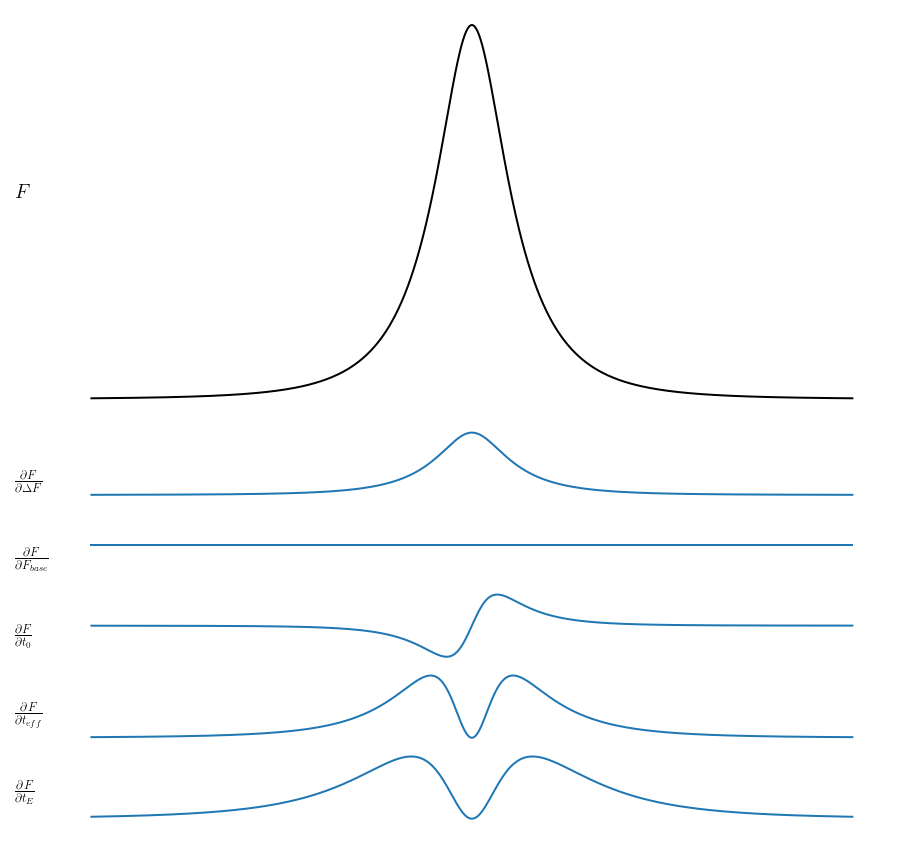

In [111]:
fig, ax = plt.subplots(6, 1, gridspec_kw={'height_ratios':[6,1,1,1,1, 1]},
             figsize=(15, 15), sharex=True)
fig.subplots_adjust(hspace=0.1)

DeltaF_ = 5.
Fb_ = 0.
t0_ = 0.
teff_ = 5.
tE_ = 10.

ax[0].plot(t, pspl(t, DeltaF_, Fb_, t0_, teff_, tE_), 'k-', lw=2)
ax[1].plot(t, grad_DeltaF(t, DeltaF_, Fb_, t0_, teff_, tE_), lw=2)
ax[2].plot(t, grad_Fb(t, DeltaF_, Fb_, t0_, teff_, tE_), lw=2)
ax[3].plot(t, grad_t0(t, DeltaF_, Fb_, t0_, teff_, tE_), lw=2)
ax[4].plot(t, grad_teff(t, DeltaF_, Fb_, t0_, teff_, tE_), lw=2)
ax[5].plot(t, grad_tE(t, DeltaF_, Fb_, t0_, teff_, tE_), lw=2)


ax[0].set_ylabel(r'$F$')
ax[1].set_ylabel(r'$\frac{\partial F}{\partial \Delta F}$')

ax[5].axis('off')

for a in ax[:].ravel():
    a.axis('off')
    
plt.text(-60, 0.8, r'$F$', fontsize=20)
plt.text(-60, 0.42, r'$\frac{\partial F}{\partial \Delta F}$', fontsize=18)
plt.text(-60, 0.32, r'$\frac{\partial F}{\partial F_{base}}$', fontsize=18)
plt.text(-60, 0.22, r'$\frac{\partial F}{\partial t_0}$', fontsize=18)
plt.text(-60, 0.12, r'$\frac{\partial F}{\partial t_{eff}}$', fontsize=18)
plt.text(-60, 0.02, r'$\frac{\partial F}{\partial t_E}$', fontsize=18)